# Assignment:

Using the approved dataset you proposed for project 2 part 1 last week, you will clean and explore the data set.

To meet the requirements for this week you must have:

    Deleted unnecessary columns.
    Deleted duplicate rows.
    Identified and addressed missing values.
    Identified and corrected inconsistencies in data for categorical values (i.e. Cat, cat, cats).
    Produced univariate visuals for the target and all features.
    Identified outliers.
    Clearly commented all of your cleaning steps and described any decisions you made.

In [34]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [35]:
import pandas as pd

In [36]:
filename = '/content/gdrive/MyDrive/Coding Dojo DATA SCIENCE BOOTCAMP/07 Week 7: Classification Models/07 Data Files/adult.csv'
df = pd.read_csv(filename)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


### Delete unnecessary columns.

In [38]:
# Remove unnecessary columns
df = df.drop(columns=['fnlwgt', 'educational-num', 'capital-gain','capital-loss'])
df.head()

,age,workclass,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K
4,18,?,Some-college,Never-married,?,Own-child,White,Female,30,United-States,<=50K


These 4 columns seemed unneccessary so they were removed.

In [39]:
df['native-country'].value_counts()

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

Considered deleting this but there are enough unique values to keep. 

In [40]:
df['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

Considered deleting this but there are enough unique values to keep. 

### Deleted duplicate rows.

In [41]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
48837    False
48838     True
48839    False
48840     True
48841    False
Length: 48842, dtype: bool

In [42]:
# Count the duplicates
df.duplicated().sum()

7760

In [43]:
# Remove duplicates
df = df.drop_duplicates()
df.duplicated().sum()

0

### Identified and addressed missing values.

In [44]:
df.isna().sum()

age               0
workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
gender            0
hours-per-week    0
native-country    0
income            0
dtype: int64

No missing values so no further action needed.

### Identified and corrected inconsistencies in data for categorical values (i.e. Cat, cat, cats).

Checked Native country and work class in code above.

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41082 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             41082 non-null  int64 
 1   workclass       41082 non-null  object
 2   education       41082 non-null  object
 3   marital-status  41082 non-null  object
 4   occupation      41082 non-null  object
 5   relationship    41082 non-null  object
 6   race            41082 non-null  object
 7   gender          41082 non-null  object
 8   hours-per-week  41082 non-null  int64 
 9   native-country  41082 non-null  object
 10  income          41082 non-null  object
dtypes: int64(2), object(9)
memory usage: 3.8+ MB


In [46]:
df['age'].value_counts()

33    1144
31    1119
34    1103
36    1100
35    1097
      ... 
88       6
85       5
87       3
89       2
86       1
Name: age, Length: 74, dtype: int64

In [47]:
df['education'].value_counts()

HS-grad         12469
Some-college     8921
Bachelors        6559
Masters          2386
Assoc-voc        1926
11th             1575
Assoc-acdm       1553
10th             1262
7th-8th           923
Prof-school       774
9th               734
12th              617
Doctorate         565
5th-6th           496
1st-4th           241
Preschool          81
Name: education, dtype: int64

In [48]:
df['marital-status'].value_counts()

Married-civ-spouse       18128
Never-married            13118
Divorced                  6168
Separated                 1509
Widowed                   1495
Married-spouse-absent      627
Married-AF-spouse           37
Name: marital-status, dtype: int64

In [49]:
df['occupation'].value_counts()

Prof-specialty       5441
Exec-managerial      5118
Adm-clerical         4714
Sales                4579
Craft-repair         4464
Other-service        4322
Machine-op-inspct    2409
?                    2380
Transport-moving     2015
Handlers-cleaners    1707
Farming-fishing      1421
Tech-support         1324
Protective-serv       934
Priv-house-serv       239
Armed-Forces           15
Name: occupation, dtype: int64

In [50]:
df['relationship'].value_counts()

Husband           15588
Not-in-family     11226
Own-child          5730
Unmarried          4858
Wife               2208
Other-relative     1472
Name: relationship, dtype: int64

In [51]:
df['race'].value_counts()

White                 34176
Black                  4518
Asian-Pac-Islander     1513
Amer-Indian-Eskimo      469
Other                   406
Name: race, dtype: int64

In [52]:
df['gender'].value_counts()

Male      26786
Female    14296
Name: gender, dtype: int64

No errors in the categorical values are identified. 

### Produced univariate visuals for the target and all features.

In [53]:
import matplotlib.pyplot as plt

In [54]:
income_counts = df['income'].value_counts().sort_values()
income_counts

>50K      9610
<=50K    31472
Name: income, dtype: int64

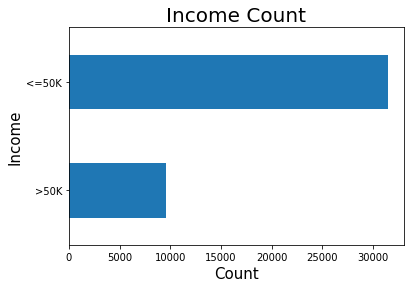

In [55]:
#Plot the counts of income

income_counts.plot(kind = 'barh')
plt.title('Income Count', fontsize = 20)
plt.ylabel('Income', fontsize = 15)
plt.xlabel('Count', fontsize = 15)

#Show your figure
plt.show()

Far more people made 50k or less than didn't. About 3x.

### Identified outliers.

In [56]:
df.describe()

,age,hours-per-week
count,41082.000000,41082.000000
mean,39.475780,40.578380
std,13.864426,12.992359
min,17.000000,1.000000
25%,28.000000,38.000000
50%,38.000000,40.000000
75%,49.000000,45.000000
max,90.000000,99.000000


Age 90 is a bit on the high side but not entirely unbelievable, we will investigate this further.

A 99 hour work week is certainly strange though. 

In [57]:
import seaborn as sns

In [58]:
hoursperweek_counts = df['hours-per-week'].value_counts().sort_values()
hoursperweek_counts

79        1
69        1
82        1
94        1
87        1
      ...  
35     1807
60     1975
45     2433
50     3571
40    17387
Name: hours-per-week, Length: 96, dtype: int64

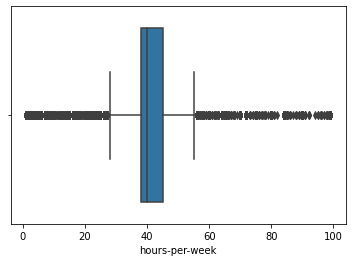

In [59]:
sns.boxplot(data = df, x='hours-per-week')

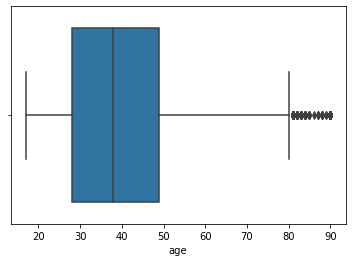

In [60]:
sns.boxplot(data = df, x='age')

There does not seem to be any outliers that seem like real errors so nothing will be removed. 

# Project 2 - Part 3

For this part of the project, you will continue your data exploration by:

  - Identifying any moderate or strong correlations between your target and your features and/or between one feature and another using a correlation heatmap.

  - Creating multivariate (multiple variables) exploratory visualizations to further understand your data and search for trends.

Then, choose two visualizations from your analysis that demonstrate key trends you found that will be of interest to a stakeholder. These visuals should be reporting quality with titles, labels, and a short explanation of the trend. Be sure to explain in a text cell the finding associated with each visual. Both of these visualizations should be easily understood by a non-technical audience (Neither should be histograms, boxplots, or correlation plots).


## Identifying any moderate or strong correlations between your target and your features and/or between one feature and another using a correlation heatmap.

In [61]:
df.corr()

,age,hours-per-week
age,1.000000,0.033128
hours-per-week,0.033128,1.000000


No real correlation between the only two numerical features. 

## Creating multivariate (multiple variables) exploratory visualizations to further understand your data and search for trends.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

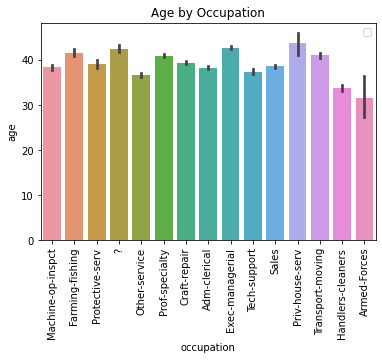

In [62]:
sns.barplot(data = df, x='occupation', y='age')
plt.legend(bbox_to_anchor=(1,1));
plt.title('Age by Occupation')
plt.xticks(rotation=90)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

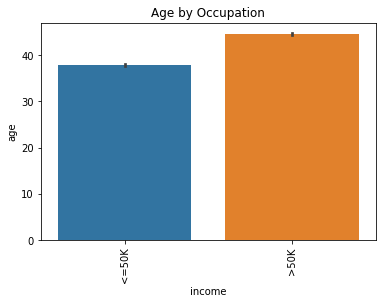

In [63]:
sns.barplot(data = df, x='income', y='age')
plt.title('Age by Occupation')
plt.xticks(rotation=90)

In [65]:
# sns.barplot(data = df, x='income', y='occupation')
# plt.legend(bbox_to_anchor=(1,1));
# plt.title('Age by Occupation')
# plt.xticks(rotation=90)

Text(0.5, 1.0, 'Income by Occupation')

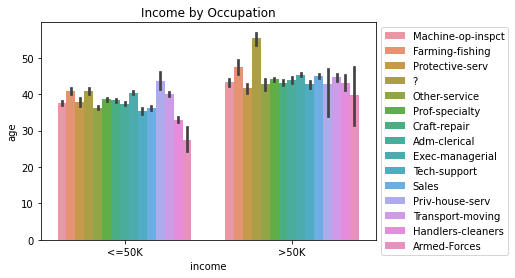

In [67]:
sns.barplot(data = df, x='income', y='age', hue='occupation')
plt.legend(bbox_to_anchor=(1,1));
plt.title('Income by Occupation')

Text(0.5, 1.0, 'Income by Occupation')

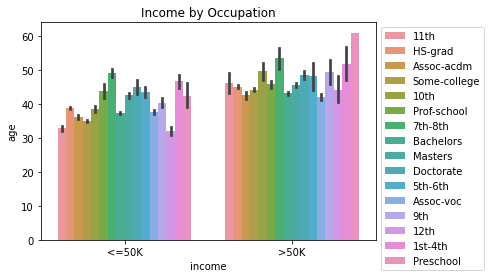

In [68]:
sns.barplot(data = df, x='income', y='age', hue='education')
plt.legend(bbox_to_anchor=(1,1));
plt.title('Income by Occupation')

Text(0.5, 1.0, 'Income by Occupation')

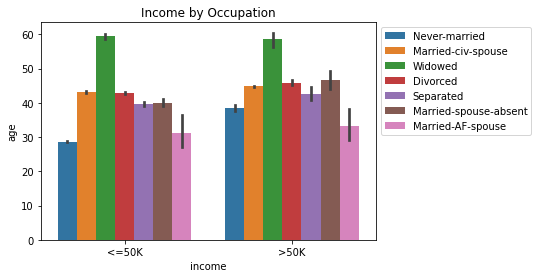

In [69]:

sns.barplot(data = df, x='income', y='age', hue='marital-status')
plt.legend(bbox_to_anchor=(1,1));
plt.title('Income by Occupation')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

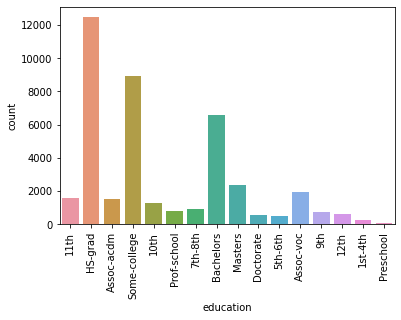

In [70]:
sns.countplot(data=df, x='education')
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Count of Income by Occupation')

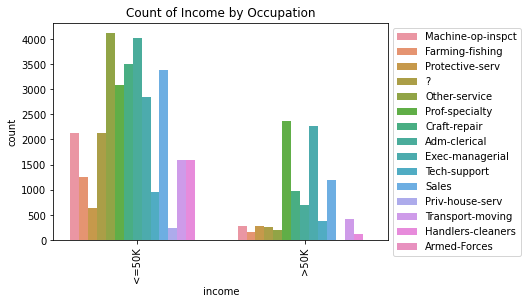

In [71]:
sns.countplot(data=df, x='income', hue='occupation')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1,1));
plt.title('Count of Income by Occupation')

<Figure size 504x504 with 0 Axes>

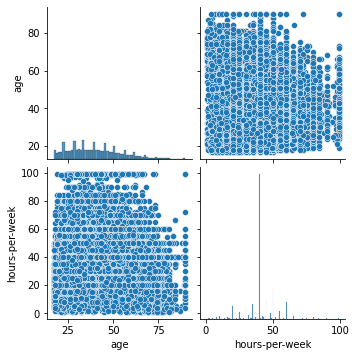

In [72]:
plt.figure(figsize=(7, 7))
sns.pairplot(df)


## Then, choose two visualizations from your analysis that demonstrate key trends you found that will be of interest to a stakeholder. These visuals should be reporting quality with titles, labels, and a short explanation of the trend. Be sure to explain in a text cell the finding associated with each visual. Both of these visualizations should be easily understood by a non-technical audience (Neither should be histograms, boxplots, or correlation plots).

Unfortunately due to the lack of numerical variables the choice of multivariate vizualizations are limited but there is enough information here to make some assessments. 

Text(0.5, 1.0, 'Count of Income by Occupation')

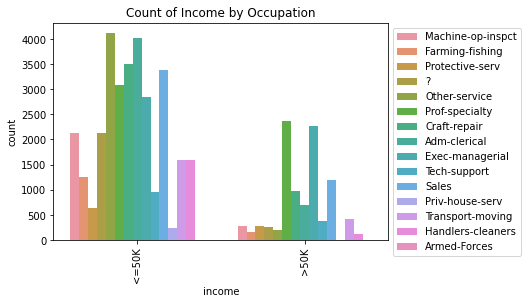

In [73]:
fig = plt.figure()
fig.set_facecolor("w")
sns.countplot(data=df, x='income', hue='occupation')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1,1));
plt.title('Count of Income by Occupation')

As you can see by this plot, the highest amount of people with low incomes were Other-service, Adm-clerical, and craft-repair. It would be beneficial to inquire as to what causes these groups to have the lowest incomes. 

Other-service is the highest and also the least specific, inquiring into this more to see what services this includes could be useful.  

The highest amount of people with high incomes were sales, Exec-managerial, and Prof-Specialty. Looking further into this with the other values such as Age and education could also prove fruitful.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

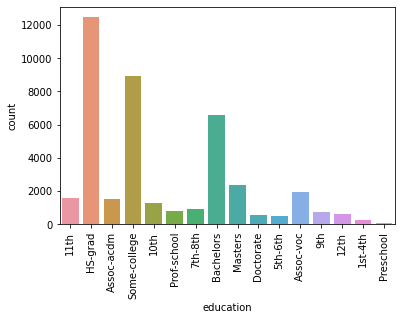

In [129]:
fig = plt.figure()
fig.set_facecolor("w")
sns.countplot(data=df, x='education')
plt.xticks(rotation=90)

From the chart we can see that most people were either HS-grads or Some College. As many know, a college degree typically results in a higher income, so finding a correlation here and finding out why most are not finishing college could prove useful. 

# Project 2 Part 4

- Ensure that you complete the appropriate pre-processing steps.
- Try multiple models and tune the hyperparameters of each model to optimize model performance (include all models and hyperparameters tested in addition to the final model).
- Perform PCA or another feature engineering technique on your dataset to see how this impacts your results. (We encourage you to try multiple techniques depending on your data!).
- Evaluate model performance with appropriate metrics for the model.
- Choose your "production" model and justify this decision.
- Go back through your code and ensure that you have provided clear comments (remember this is for your portfolio!).
- Update your project readme and describe your final model, your final model evaluation metrics, and explain whether or not your model would be useful in production and if so, how it should be used.
- Commit your code to GitHub.


## Ensure that you complete the appropriate pre-processing steps.

In [75]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, \
f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

In [76]:
df.head()

,age,workclass,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K
4,18,?,Some-college,Never-married,?,Own-child,White,Female,30,United-States,<=50K


In [77]:
# Split
X = df.drop(columns='income')
y = df['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [78]:
# Selectors
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')
# Scaler
scaler = StandardScaler()
# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [79]:
num_tuple = (scaler, num_selector)
ohe_tuple = (ohe, cat_selector)

# let the numeric columns pass through unchanged
preprocessor = make_column_transformer(ohe_tuple, num_tuple)

We do not need an ordinal encoder as none of the features require it. 

In [80]:
def eval_classification(true, pred, name='Model'):
  """shows classification_report and confusion matrix
  for the model predictions"""
  
  print(name, '\n')
  print(classification_report(true, pred))
  ConfusionMatrixDisplay.from_predictions(true, pred)
  plt.show()

  scores = pd.DataFrame()
  scores['Model Name'] = [name]
  scores['Precision'] = [precision_score(true, pred)]
  scores['Recall'] = [recall_score(true, pred)]
  scores['F1 Score'] = [f1_score(true, pred)]
  scores['Accuracy'] = [accuracy_score(true, pred)]

  return scores

## Try multiple models and tune the hyperparameters of each model to optimize model performance (include all models and hyperparameters tested in addition to the final model).

## Also includes: Evaluate model performance with appropriate metrics for the model.

### First we will use a KNN model

In [81]:
# make and fit a pipe
knn = KNeighborsClassifier()
knn_pipe = make_pipeline(preprocessor, knn)
knn_pipe.fit(X_train, y_train)



Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff3f939fed0>),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff3f939fe90>)])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [82]:
#save predictions
train_preds = knn_pipe.predict(X_train)
test_preds = knn_pipe.predict(X_test)

In [83]:
#Training Matrics

print('Classification Report for Training Set')
train_report = classification_report(y_train, train_preds)
print(train_report)

Classification Report for Training Set
              precision    recall  f1-score   support

       <=50K       0.90      0.93      0.91     23613
        >50K       0.73      0.66      0.70      7198

    accuracy                           0.86     30811
   macro avg       0.82      0.79      0.80     30811
weighted avg       0.86      0.86      0.86     30811



In [84]:
# Testing matrics
print('Classification Report for Testing Set')

test_report = classification_report(y_test, test_preds)
print(test_report)

Classification Report for Testing Set
              precision    recall  f1-score   support

       <=50K       0.86      0.89      0.88      7859
        >50K       0.60      0.54      0.57      2412

    accuracy                           0.81     10271
   macro avg       0.73      0.72      0.72     10271
weighted avg       0.80      0.81      0.81     10271



### Hypertuning KNN model

In [85]:
knn_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('onehotencoder',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse=False),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7ff3f939fed0>),
                                   ('standardscaler', StandardScaler(),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7ff3f939fe90>)])),
  ('kneighborsclassifier', KNeighborsClassifier())],
 'verbose': False,
 'columntransformer': ColumnTransformer(transformers=[('onehotencoder',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse=False),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff3f939fed0>),
                                 ('sta

In [86]:
knn_param_grid = {'kneighborsclassifier__n_neighbors': range(2,5),
              'kneighborsclassifier__leaf_size': range(29,31),
              'kneighborsclassifier__weights': ['distance','uniform']}

In [87]:
knn_pipe_gs = GridSearchCV(knn_pipe, knn_param_grid)

In [88]:
knn_pipe_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7ff3f939fed0>),
                                                                        ('standardscaler',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7ff3f939fe90>)])),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__leaf_size': range(29, 31),
                         'kneighborsclassifier__n_neighbors': range(2, 5),
                         'kneighborsclassifier__weights': ['distance',
                                                           'uniform']})

In [89]:
print('Best KNN Parameters:')
print(knn_pipe_gs.best_params_)

Best KNN Parameters:
{'kneighborsclassifier__leaf_size': 29, 'kneighborsclassifier__n_neighbors': 4, 'kneighborsclassifier__weights': 'uniform'}


In [90]:
#retrieve the best version of the model
knn_best_model = knn_pipe_gs.best_estimator_
 
#refit the model on the whole training set
knn_best_model.fit(X_train, y_train)

#save predictions
best_train_preds = knn_best_model.predict(X_train)
best_test_preds = knn_best_model.predict(X_test)




In [91]:
#Training Metrics
print(classification_report(y_train, best_train_preds))

              precision    recall  f1-score   support

       <=50K       0.87      0.97      0.92     23613
        >50K       0.83      0.53      0.64      7198

    accuracy                           0.86     30811
   macro avg       0.85      0.75      0.78     30811
weighted avg       0.86      0.86      0.85     30811



In [92]:
#Test Metrics
print(classification_report(y_test, best_test_preds))

              precision    recall  f1-score   support

       <=50K       0.83      0.93      0.88      7859
        >50K       0.62      0.39      0.48      2412

    accuracy                           0.80     10271
   macro avg       0.73      0.66      0.68     10271
weighted avg       0.78      0.80      0.78     10271



### Logistic regression Model

In [93]:
logreg = LogisticRegression(max_iter=1000)
log_pipe = make_pipeline(preprocessor, logreg)
log_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff3f939fed0>),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff3f939fe90>)])),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [94]:
#save predictions
train_preds = log_pipe.predict(X_train)
test_preds = log_pipe.predict(X_test)

In [95]:
#Training Matrics

print('Classification Report for Training Set')
train_report = classification_report(y_train, train_preds)
print(train_report)

Classification Report for Training Set
              precision    recall  f1-score   support

       <=50K       0.86      0.92      0.89     23613
        >50K       0.67      0.52      0.59      7198

    accuracy                           0.83     30811
   macro avg       0.77      0.72      0.74     30811
weighted avg       0.82      0.83      0.82     30811



In [96]:
# Testing matrics
print('Classification Report for Testing Set')

test_report = classification_report(y_test, test_preds)
print(test_report)

Classification Report for Testing Set
              precision    recall  f1-score   support

       <=50K       0.86      0.93      0.89      7859
        >50K       0.69      0.51      0.59      2412

    accuracy                           0.83     10271
   macro avg       0.77      0.72      0.74     10271
weighted avg       0.82      0.83      0.82     10271



### Hypertuning LogReg

In [97]:
log_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('onehotencoder',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse=False),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7ff3f939fed0>),
                                   ('standardscaler', StandardScaler(),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7ff3f939fe90>)])),
  ('logisticregression', LogisticRegression(max_iter=1000))],
 'verbose': False,
 'columntransformer': ColumnTransformer(transformers=[('onehotencoder',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse=False),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff3f939fed0>),
                             

In [98]:
log_param_grid = {'logisticregression__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [99]:
log_pipe_gs = GridSearchCV(log_pipe, log_param_grid)

In [100]:
log_pipe_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7ff3f939fed0>),
                                                                        ('standardscaler',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7ff3f939fe90>)])),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=1000))]),
             param_grid={'logisticregression__C': [0.0001, 0.001, 0.01, 0.1, 1,
                                                   10, 100, 1000]})

In [101]:
print('Best Log Parameters:')
print(log_pipe_gs.best_params_)

Best Log Parameters:
{'logisticregression__C': 1}


In [102]:
#retrieve the best version of the model
log_best_model = log_pipe_gs.best_estimator_
 
#refit the model on the whole training set
log_best_model.fit(X_train, y_train)

#save predictions
best_train_preds = log_best_model.predict(X_train)
best_test_preds = log_best_model.predict(X_test)

In [103]:
#Training Metrics
print(classification_report(y_train, best_train_preds))

              precision    recall  f1-score   support

       <=50K       0.86      0.92      0.89     23613
        >50K       0.67      0.52      0.59      7198

    accuracy                           0.83     30811
   macro avg       0.77      0.72      0.74     30811
weighted avg       0.82      0.83      0.82     30811



In [104]:
#Test Metrics
print(classification_report(y_test, best_test_preds))

              precision    recall  f1-score   support

       <=50K       0.86      0.93      0.89      7859
        >50K       0.69      0.51      0.59      2412

    accuracy                           0.83     10271
   macro avg       0.77      0.72      0.74     10271
weighted avg       0.82      0.83      0.82     10271



### DecisionTreeClassifier Tree Model

In [105]:
dec = DecisionTreeClassifier()


In [106]:
dec_pipe = make_pipeline(preprocessor, dec)
dec_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff3f939fed0>),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff3f939fe90>)])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [107]:
#save predictions
train_preds = dec_pipe.predict(X_train)
test_preds = dec_pipe.predict(X_test)

In [130]:
# Training matrics
print('Classification Report for Training Set DecisionTreeClassifier')

print(classification_report(y_train, train_preds))

Classification Report for Training Set DecisionTreeClassifier
              precision    recall  f1-score   support

       <=50K       0.97      1.00      0.98     23613
        >50K       1.00      0.90      0.95      7198

    accuracy                           0.98     30811
   macro avg       0.98      0.95      0.96     30811
weighted avg       0.98      0.98      0.98     30811



In [131]:
# Testing matrics
print('Classification Report for Testing Set DecisionTreeClassifier')

print(classification_report(y_test, test_preds))

Classification Report for Testing Set DecisionTreeClassifier
              precision    recall  f1-score   support

       <=50K       0.83      0.84      0.83      7859
        >50K       0.46      0.46      0.46      2412

    accuracy                           0.75     10271
   macro avg       0.65      0.65      0.65     10271
weighted avg       0.75      0.75      0.75     10271



### Hypertuning DecisionTreeClassifier Model

In [110]:
dec_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('onehotencoder',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse=False),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7ff3f939fed0>),
                                   ('standardscaler', StandardScaler(),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7ff3f939fe90>)])),
  ('decisiontreeclassifier', DecisionTreeClassifier())],
 'verbose': False,
 'columntransformer': ColumnTransformer(transformers=[('onehotencoder',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse=False),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7ff3f939fed0>),
                                 (

In [111]:
dec_param_grid = {'decisiontreeclassifier__max_depth': [3,6,8],
              'decisiontreeclassifier__min_samples_leaf': [3,15,20],
              'decisiontreeclassifier__min_samples_split': [2, 10, 100]}

In [112]:
dec_pipe_gs = GridSearchCV(dec_pipe, dec_param_grid)

In [113]:
dec_pipe_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7ff3f939fed0>),
                                                                        ('standardscaler',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7ff3f939fe90>)])),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             param_grid={'decisiontreeclassifier__max_depth': [3, 6, 8],
                         'decisiontreeclassifier__min_samples_leaf': [3, 15,
                                                                      20],
                         'decisiontreeclassifier__min_samples_split': [2, 10,
                                                                       100]})

In [114]:
print('Best Log Parameters:')
print(dec_pipe_gs.best_params_)

Best Log Parameters:
{'decisiontreeclassifier__max_depth': 8, 'decisiontreeclassifier__min_samples_leaf': 3, 'decisiontreeclassifier__min_samples_split': 100}


In [115]:
#retrieve the best version of the model
dec_best_model = dec_pipe_gs.best_estimator_
 
#refit the model on the whole training set
dec_best_model.fit(X_train, y_train)

#save predictions
best_dec_train_preds = dec_best_model.predict(X_train)
best_dec_test_preds = dec_best_model.predict(X_test)

In [116]:
#Training Metrics
print(classification_report(y_train, best_dec_train_preds))

              precision    recall  f1-score   support

       <=50K       0.86      0.93      0.89     23613
        >50K       0.68      0.52      0.59      7198

    accuracy                           0.83     30811
   macro avg       0.77      0.72      0.74     30811
weighted avg       0.82      0.83      0.82     30811



In [117]:
#Test Metrics
print(classification_report(y_test, best_dec_test_preds))

              precision    recall  f1-score   support

       <=50K       0.86      0.93      0.89      7859
        >50K       0.68      0.49      0.57      2412

    accuracy                           0.83     10271
   macro avg       0.77      0.71      0.73     10271
weighted avg       0.81      0.83      0.82     10271



The results from all the models varied widely, but the Dec Tree model had the best overall results. The original model worked well on the training data and the tuned model worked well on the testing data. With more tuning this model could have great results.

## Perform PCA or another feature engineering technique on your dataset to see how this impacts your results. (We encourage you to try multiple techniques depending on your data!).

In [118]:
df

,age,workclass,education,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K
4,18,?,Some-college,Never-married,?,Own-child,White,Female,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
48835,53,Private,Masters,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,United-States,>50K
48836,22,Private,Some-college,Never-married,Protective-serv,Not-in-family,White,Male,40,United-States,<=50K
48837,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
48839,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K


In [119]:
from sklearn.decomposition import PCA

In [120]:
# Instantiate & fit data using PCA
pca = PCA(n_components=.90)
# Create a transformer pipeline
transformer = make_pipeline(preprocessor, pca)


I will use PCA with my preferred model, Decision Tree.

In [121]:
dec_pca_pipe = make_pipeline(transformer, dec)
dec_pca_pipe.fit(X_train, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(transformers=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7ff3f939fed0>),
                                                                  ('standardscaler',
                                                                   StandardScaler(),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7ff3f939fe90>)])),
                                 ('pca', PCA(n_components=0.9))])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [122]:
#save predictions
pca_train_preds = dec_pca_pipe.predict(X_train)
pca_test_preds = dec_pca_pipe.predict(X_test)

In [123]:
# Training matrics
print('Classification Report for Testing Set')

print(classification_report(y_train, pca_train_preds))

Classification Report for Testing Set
              precision    recall  f1-score   support

       <=50K       0.97      1.00      0.98     23613
        >50K       1.00      0.90      0.95      7198

    accuracy                           0.98     30811
   macro avg       0.98      0.95      0.96     30811
weighted avg       0.98      0.98      0.98     30811



In [124]:
# Training matrics
print('Classification Report for Testing Set')

print(classification_report(y_test, pca_test_preds))

Classification Report for Testing Set
              precision    recall  f1-score   support

       <=50K       0.83      0.84      0.84      7859
        >50K       0.46      0.45      0.45      2412

    accuracy                           0.75     10271
   macro avg       0.65      0.64      0.64     10271
weighted avg       0.74      0.75      0.75     10271



The test data seems to have dropped when PCA is used on the original model.

In [125]:
#retrieve the best version of the model
dec_best_model = DecisionTreeClassifier(max_depth= 8, min_samples_leaf=3, min_samples_split=100 )
dec_best_pca_pipe = make_pipeline(transformer, dec_best_model)

#refit the model on the whole training set
dec_best_pca_pipe.fit(X_train, y_train)

#save predictions
best_dec_train_preds = dec_best_pca_pipe.predict(X_train)
best_dec_test_preds = dec_best_pca_pipe.predict(X_test)

In [126]:
# Training matrics
print('Classification Report for Testing Set')

print(classification_report(y_train, best_dec_train_preds))

Classification Report for Testing Set
              precision    recall  f1-score   support

       <=50K       0.87      0.92      0.89     23613
        >50K       0.68      0.54      0.60      7198

    accuracy                           0.83     30811
   macro avg       0.77      0.73      0.75     30811
weighted avg       0.82      0.83      0.83     30811



In [127]:
# Training matrics
print('Classification Report for Testing Set')

print(classification_report(y_test, best_dec_test_preds))

Classification Report for Testing Set
              precision    recall  f1-score   support

       <=50K       0.86      0.91      0.88      7859
        >50K       0.63      0.50      0.56      2412

    accuracy                           0.81     10271
   macro avg       0.74      0.70      0.72     10271
weighted avg       0.80      0.81      0.81     10271



The best model also took a hit, albeit a smaller hit, than the original model. 

Feature engineering will be skipped as the data came very clean, organized, and the target only had 2 results.

## Choose your "production" model and justify this decision.

The final model I have chosen for this project will be the original DecisionTreeClassifier Model. 

It had the best overall results and leaves the most room for tuning and refining. 

There were still a large amount ways the model could be tuned, which would take more time to test, but the results of the model with its default parameters are promising.